In [66]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Input

In [97]:
stock_data=pd.read_csv(r"C:\Users\hp\Desktop\tatatest (1).csv")

In [98]:
# Set the date column as the index
stock_data.set_index('Date', inplace=True)

In [99]:
# Convert the data to a numpy array
data = stock_data.values

In [100]:
# Scale the data using Min-Max Scaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [112]:
# Split the data into training and testing sets
train_size = int(0.8 * len(data))
X_train, Y_train = data[0:train_size, :-1], data[0:train_size, -1]
X_test, Y_test = data[train_size:, :-1], data[train_size:, -1]

In [113]:
# Reshape the data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [114]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1))

In [115]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Fit the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
1/1 - 4s - 4s/step - loss: 0.2145
Epoch 2/100
1/1 - 0s - 66ms/step - loss: 0.2044
Epoch 3/100
1/1 - 0s - 57ms/step - loss: 0.1939
Epoch 4/100
1/1 - 0s - 64ms/step - loss: 0.1852
Epoch 5/100
1/1 - 0s - 99ms/step - loss: 0.1767
Epoch 6/100
1/1 - 0s - 43ms/step - loss: 0.1698
Epoch 7/100
1/1 - 0s - 40ms/step - loss: 0.1633
Epoch 8/100
1/1 - 0s - 67ms/step - loss: 0.1557
Epoch 9/100
1/1 - 0s - 50ms/step - loss: 0.1509
Epoch 10/100
1/1 - 0s - 46ms/step - loss: 0.1441
Epoch 11/100
1/1 - 0s - 32ms/step - loss: 0.1392
Epoch 12/100
1/1 - 0s - 33ms/step - loss: 0.1338
Epoch 13/100
1/1 - 0s - 82ms/step - loss: 0.1303
Epoch 14/100
1/1 - 0s - 41ms/step - loss: 0.1268
Epoch 15/100
1/1 - 0s - 44ms/step - loss: 0.1247
Epoch 16/100
1/1 - 0s - 82ms/step - loss: 0.1223
Epoch 17/100
1/1 - 0s - 73ms/step - loss: 0.1221
Epoch 18/100
1/1 - 0s - 67ms/step - loss: 0.1230
Epoch 19/100
1/1 - 0s - 75ms/step - loss: 0.1222
Epoch 20/100
1/1 - 0s - 70ms/step - loss: 0.1233
Epoch 21/100
1/1 - 0s - 77ms/st

In [116]:
# Make predictions
predicted_stock_price = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


In [130]:
predicted_stock_price = predicted_stock_price.reshape(-1, 6)

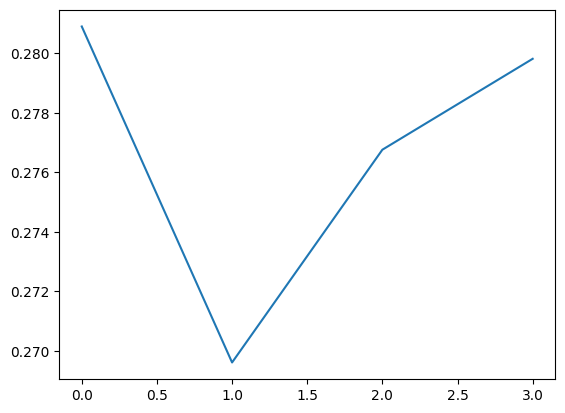

In [135]:
plt.plot(predicted_stock_price[:, i], label=f'Predicted Stock Price {i}')
plt.show()

In [132]:
predicted_stock_price = predicted_stock_price.reshape(-1, 6)

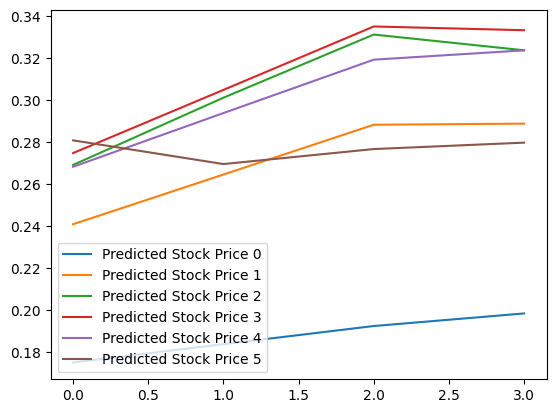

In [134]:
for i in range(6):
    plt.plot(predicted_stock_price[:, i], label=f'Predicted Stock Price {i}')
plt.legend()
plt.show()